# Data description
The dataset Natural_images is downloaded form kaggle. Source of the dataset is https://www.kaggle.com/prasunroy/natural-images.
There are 6899 images in the datasets of 8 different classes. The 8 different classes are : 'airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike' and'person'

# Objectives
Here we will build two models i.e. dense layer model and convolutional layered model and make comparisions. We will try to find, which model does better for this dataset. 

# Importing libraries and modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix


In [2]:
print(os.listdir('natural_images'))
# It prints all folders inside natural_images folder in my local machine

['.DS_Store', 'airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [3]:
directory = 'natural_images'
categories = os.listdir('natural_images')[1:]
categories

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In the local folder named 'natural_images', we have images downloaded from kaggle and we will convert all the images into array. We will have array in a list named 'data' and the name of categories in list named 'labels' as shown as below. 

In [4]:
data = []
labels = []

for c in categories:
    path = os.path.join(directory,c)
    #print(path)
    image_path = os.listdir(path)
    #print(image_path)
    for img in image_path:
        img_path = os.path.join(path,img)
        #print(img_path)
        image = load_img(img_path,target_size=(64,64))#grayscale=True)
        image = img_to_array(image)
        data.append(image)
        labels.append(c)

# Normalizing data
If we see below, data[0][0][0] shows the values in decimal form (dtype=float 32). So, it needs to be changed either converting into integer form or by dividing by 255 as we can also see the error below when we wanted to plot it. 

Error: "Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)."

In [5]:
data[0][0][0]

array([224., 241., 233.], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


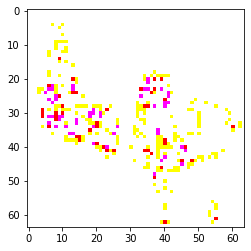

In [6]:
plt.imshow(data[1]);

We can see below, we have plotted the first image by converting its values into integers.

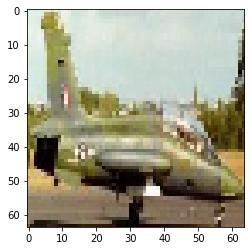

In [7]:
plt.imshow(data[0].astype(int));

But lets normalize the data by dividing each pixels of image by 255. Normalizing 'image inputs' is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This makes convergence faster while training the network.
Source: https://becominghuman.ai/image-data-pre-processing-for-neural-networks-498289068258

In [8]:
data = [a/255 for a in data ]

In [9]:
data[0][0][0]

array([0.8784314 , 0.94509804, 0.9137255 ], dtype=float32)

# Converting list into numpy array
If we check our data, it is a list of arrays which means, our images are inside a list. It is better to change our list to numpy array because using numpy, we can do various different tasks for instance, checking the shape of an array as shown as below. 

In [10]:
data = np.array(data)
labels = np.array(labels)

In [11]:
data.shape, labels.shape

((6899, 64, 64, 3), (6899,))

So checking shape above, we can see that we have total 6899 images of size 64 by 64 which is using 3 colour channels i.e RGB .....(6899,64,64,3).

# Encoding labels 
If we check the labels, we can see that they are in string form which means our labels are in categorical form. It is necessary to convert the labels into integer form. For this case we will first create a dictionary of labels and integer from 0 to 7 as shown in 'dic' below. Then we will convert the 'labels' into pandas Series (so that we can use map function) and we will replace the labels into the interger using the map function as shown below. 

In [12]:
dic = {}
i=0
for category in categories:
    dic[category]=i
    i+=1

In [13]:
dic

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

Above, we have new numerical labels for string labels. For instance, 0 means airplance, while person is 7

In [14]:
new_labels = pd.Series(labels)
new_labels = new_labels.map(dic)

Below we will convert the Series (new_lables) into numpy array again. 

In [15]:
final_labels = np.array(new_labels)
final_labels

array([0, 0, 0, ..., 7, 7, 7])

# Data distribution

In [16]:
np.unique(final_labels,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 727,  968,  885,  702,  843, 1000,  788,  986]))

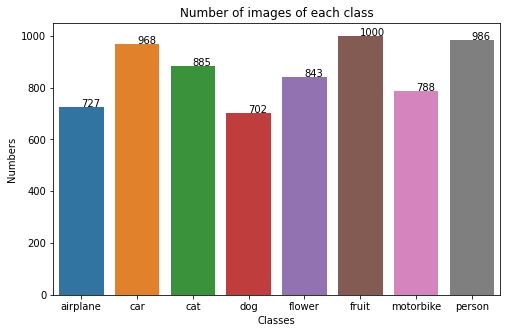

In [17]:
label_=np.unique(final_labels,return_counts=True)[0]
numbers=np.unique(final_labels,return_counts=True)[1]

plt.figure(figsize=(8,5))
sns.barplot(x=categories,y=np.unique(final_labels,return_counts=True)[1],)

for a,b in zip(label_, numbers): 
    plt.text(x=a, y=b, s=b)

plt.xlabel('Classes')
plt.ylabel('Numbers')
plt.title('Number of images of each class');

Above we can see how images of different classes have been distributed. There are less images of dogs whereas more images of fruits.

# Splitting data into training and testing

Lets us split our data into training and testing set.

In [18]:
X_train, X_test, y_train,y_test = train_test_split(data, final_labels)

In [19]:
X_train.shape, y_train.shape

((5174, 64, 64, 3), (5174,))

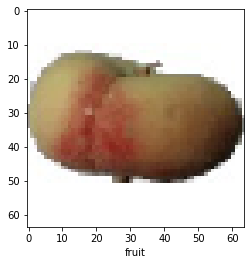

In [20]:
plt.imshow(X_train[1])
plt.xlabel(categories[y_train[1]]);

# Implementing Neural Network
First we will be using a dense layer model and do the predictions. We will also try to add some convulutional layers below as a second model and see the differences which model do better. 

## Dense layer model
To avoid overfitting, l2 regularization has been used below. 

In [21]:
model = Sequential()
model.add(keras.layers.Flatten(input_shape=(64,64,3)))
model.add(keras.layers.Dense(300,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(150, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(8, activation='softmax',kernel_regularizer=keras.regularizers.l2(0.001)))

In [22]:
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
dense_model_history = model.fit(X_train, y_train,epochs=25,batch_size=30,validation_split=0.15)

Epoch 1/25
147/147 [==============================] - 20s 133ms/step - loss: 10.3133 - accuracy: 0.3790 - val_loss: 9.4977 - val_accuracy: 0.5470
Epoch 2/25
147/147 [==============================] - 18s 122ms/step - loss: 9.2353 - accuracy: 0.6222 - val_loss: 8.9764 - val_accuracy: 0.5933
Epoch 3/25
147/147 [==============================] - 13s 91ms/step - loss: 8.6008 - accuracy: 0.6878 - val_loss: 8.2661 - val_accuracy: 0.6911
Epoch 4/25
147/147 [==============================] - 15s 96ms/step - loss: 8.0200 - accuracy: 0.7587 - val_loss: 7.8430 - val_accuracy: 0.6911
Epoch 5/25
147/147 [==============================] - 13s 88ms/step - loss: 7.5908 - accuracy: 0.7505 - val_loss: 7.3559 - val_accuracy: 0.7297
Epoch 6/25
147/147 [==============================] - 12s 84ms/step - loss: 7.1511 - accuracy: 0.7893 - val_loss: 7.2772 - val_accuracy: 0.6435
Epoch 7/25
147/147 [==============================] - 11s 75ms/step - loss: 6.7953 - accuracy: 0.7771 - val_loss: 6.9274 - val_accura

### Model Summary

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 300)               3686700   
_________________________________________________________________
dense_1 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                9664      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 520       
Total params: 3,742,034
Trainable params: 3,742,034
Non-trainable params: 0
_________________________________________________________________


### Training score Vs Validation score

In [25]:
train_loss = dense_model_history.history['loss']
val_loss = dense_model_history.history['val_loss']
train_accuracy = dense_model_history.history['accuracy']
val_accuracy = dense_model_history.history['val_accuracy']
no_epochs = range(len(train_loss))

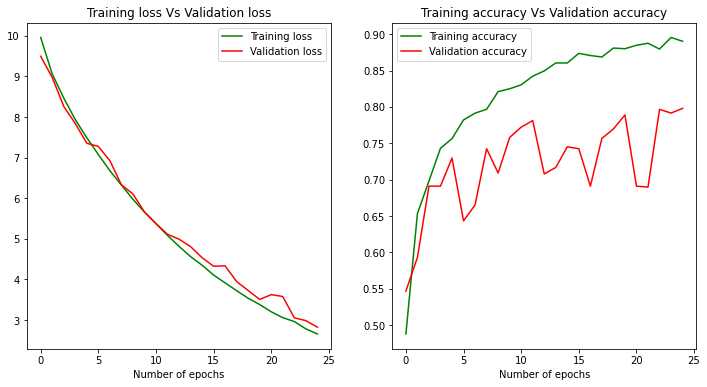

In [26]:
plt.subplots(nrows=1,ncols=2,figsize=(12,6))
plt.subplot(121,)
plt.plot(no_epochs,train_loss,color='green',label='Training loss')
plt.plot(no_epochs, val_loss, color='red', label = 'Validation loss')
plt.legend()
plt.xlabel('Number of epochs')
plt.title('Training loss Vs Validation loss')

plt.subplot(122)
plt.plot(no_epochs,train_accuracy,color='green',label='Training accuracy')
plt.plot(no_epochs, val_accuracy, color='red', label = 'Validation accuracy')
plt.legend()
plt.xlabel('Number of epochs')
plt.title('Training accuracy Vs Validation accuracy');

### Prediction on X_test

Here below, lets predict y on the basis of X_test using our model. The output, 'predicted_y' is the probabilies of all our 8 classes. The highest probability is the predicted class. To find the index of highest probablity of the list we use np.argmax() function. 

In [27]:
predicted_y = model.predict(X_test)
predicted_y

array([[2.8967902e-03, 2.7739073e-03, 2.5657612e-01, ..., 1.3912724e-01,
        3.9105065e-04, 5.1988643e-03],
       [9.7309768e-01, 2.2056277e-03, 1.0588104e-02, ..., 6.2519632e-04,
        8.4384007e-04, 2.9135036e-04],
       [2.2156321e-06, 6.5785230e-07, 6.7652407e-05, ..., 1.2239051e-05,
        7.0763836e-06, 9.9967194e-01],
       ...,
       [8.5987797e-04, 8.9564097e-01, 7.3395044e-02, ..., 5.6957192e-06,
        2.0075709e-04, 4.2500986e-05],
       [2.9734075e-02, 6.4191164e-04, 6.2808323e-01, ..., 3.6534013e-03,
        7.0976250e-02, 7.9416126e-02],
       [2.0922032e-05, 6.7439250e-05, 1.2710414e-04, ..., 9.9928975e-01,
        9.2357894e-08, 4.0727510e-04]], dtype=float32)

If we check a prediction, it will give output as 8 probablilites as shown below in predicted_y[4].Those probabilites are probabilty of each class. So to find its predicted class (label) we select the index of higest probability of the output using np.argmax()

In [28]:
print('Predicted probabilities: ',predicted_y[4])
print('Index of highest probability i.e. predicted class is : ', np.argmax(predicted_y[4]))

Predicted probabilities:  [0.05888848 0.2373445  0.19139788 0.19110745 0.21462911 0.02058692
 0.00522167 0.08082405]
Index of highest probability i.e. predicted class is :  1


Lets try to plot the 4th images in X_test. We know that the predicted class is 5 which is fruit in our dictionary (dic) or a list (categories) 
- ((Note: different class can come when we run this code again becuase of data shuffling.)) 

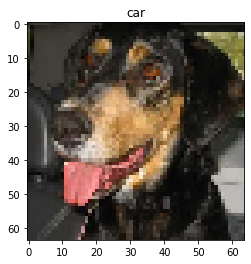

In [29]:
plt.imshow(X_test[4])
plt.title(categories[np.argmax(predicted_y[4])]);

Our model is overfitting. So, the result may not be always right. 

### True labels Vs predicted labels

Lets us plot the first 6 images from X_test and compare them with the predicted y as shown as below. The 6 images are plotted and then its predicted class is printed on its title.

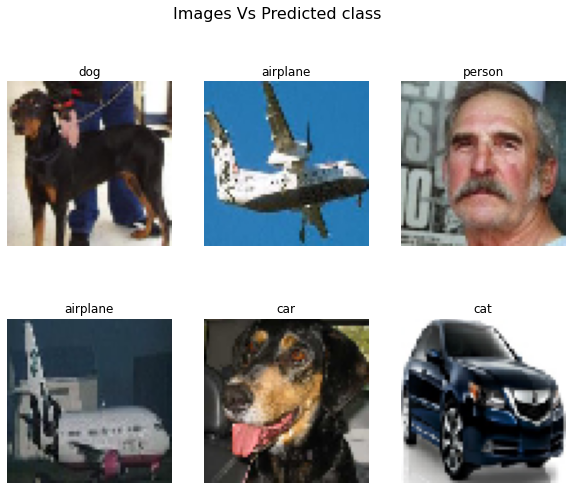

In [30]:
plt.subplots(nrows=2,ncols=3,figsize=(10,8))
plt.suptitle("Images Vs Predicted class", fontsize=16)
for i in range(6):
    plt.subplot(2,3,i+1)
    predicts = np.argmax(predicted_y[i])
    #print('The first 6 predictions are of class:',predicts)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(categories[predicts]);

From the above plots, we can see how well the model has done. 

### Classification Report (Dense layer model)

In [31]:
predicted_ylabels = [np.argmax(i) for i in predicted_y]
#predicted_ylabels

In [32]:
print(classification_report(y_test,predicted_ylabels))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       197
           1       0.96      0.76      0.85       239
           2       0.59      0.65      0.62       223
           3       0.51      0.50      0.50       157
           4       0.79      0.79      0.79       212
           5       0.94      1.00      0.97       238
           6       0.88      0.84      0.86       192
           7       0.89      0.99      0.94       267

    accuracy                           0.81      1725
   macro avg       0.81      0.80      0.80      1725
weighted avg       0.82      0.81      0.81      1725



If we see the classification report, we can see that f1-score for our class 2 (cat),3 (dog) are not good. So, we can say that our model is not able to distinguish between cat and dog properly. 

### Confusion matrix (Dense model)

In [33]:
confusion_matrix(y_test,predicted_ylabels)

array([[167,   2,   5,  14,   4,   2,   2,   1],
       [  9, 181,  20,   2,   8,   3,  11,   5],
       [  3,   2, 146,  41,  14,   5,   4,   8],
       [  3,   1,  50,  79,  13,   2,   3,   6],
       [  5,   1,  16,  12, 168,   2,   2,   6],
       [  0,   0,   0,   1,   0, 237,   0,   0],
       [  2,   2,   8,   7,   5,   0, 162,   6],
       [  0,   0,   1,   0,   2,   0,   0, 264]])

So, we also can see in confustion matrix the number of wrong classification for cats and dogs in class 2 and 3 respectively. 

## Convolutional layered model
We add two convulational layers, two maxpooling and 3 dense layers. Also, Lets add a dropout layer to control the overfitting. 

In [34]:
cnn = keras.Sequential()
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
cnn.add(keras.layers.MaxPooling2D((2, 2))),
    
cnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
cnn.add(keras.layers.MaxPooling2D((2, 2))),

cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dropout(0.5))
cnn.add(keras.layers.Dense(150, activation='relu'))
cnn.add(keras.layers.Dense(64, activation='relu'))
cnn.add(keras.layers.Dense(8, activation='softmax'))

In [35]:
cnn.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [36]:
cnn_model_history=cnn.fit(X_train, y_train,batch_size=30,epochs=25,validation_split=0.20)

Epoch 1/25
138/138 [==============================] - 28s 195ms/step - loss: 2.0335 - accuracy: 0.2096 - val_loss: 1.6467 - val_accuracy: 0.4831
Epoch 2/25
138/138 [==============================] - 25s 183ms/step - loss: 1.5605 - accuracy: 0.4500 - val_loss: 1.1230 - val_accuracy: 0.6280
Epoch 3/25
138/138 [==============================] - 28s 198ms/step - loss: 1.1054 - accuracy: 0.6046 - val_loss: 0.8474 - val_accuracy: 0.6812
Epoch 4/25
138/138 [==============================] - 25s 184ms/step - loss: 0.8606 - accuracy: 0.7049 - val_loss: 0.7493 - val_accuracy: 0.7111
Epoch 5/25
138/138 [==============================] - 25s 178ms/step - loss: 0.7165 - accuracy: 0.7467 - val_loss: 0.7593 - val_accuracy: 0.7169
Epoch 6/25
138/138 [==============================] - 26s 191ms/step - loss: 0.5965 - accuracy: 0.7785 - val_loss: 0.5651 - val_accuracy: 0.7749
Epoch 7/25
138/138 [==============================] - 30s 216ms/step - loss: 0.5082 - accuracy: 0.8136 - val_loss: 0.5154 - val_ac

This model looks much better as this is less overfitting than the first model.

### Model summary

In [37]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dropout (Dropout)            (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)              

### Training score Vs Validation score

In [38]:
cnn_train_loss = cnn_model_history.history['loss']
cnn_val_loss = cnn_model_history.history['val_loss']
cnn_train_accuracy = cnn_model_history.history['accuracy']
cnn_val_accuracy = cnn_model_history.history['val_accuracy']
cnn_no_epochs = range(len(cnn_train_loss))

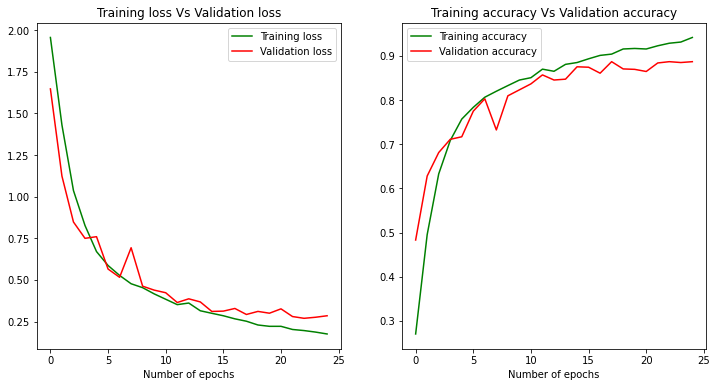

In [39]:
plt.subplots(nrows=1,ncols=2,figsize=(12,6))
plt.subplot(121,)
plt.plot(cnn_no_epochs,cnn_train_loss,color='green',label='Training loss')
plt.plot(cnn_no_epochs, cnn_val_loss, color='red', label = 'Validation loss')
plt.legend()
plt.xlabel('Number of epochs')
plt.title('Training loss Vs Validation loss')

plt.subplot(122)
plt.plot(cnn_no_epochs,cnn_train_accuracy,color='green',label='Training accuracy')
plt.plot(cnn_no_epochs, cnn_val_accuracy, color='red', label = 'Validation accuracy')
plt.legend()
plt.xlabel('Number of epochs')
plt.title('Training accuracy Vs Validation accuracy');

### Prediction against X_test

In [40]:
cnn_y_pred = cnn.predict(X_test)

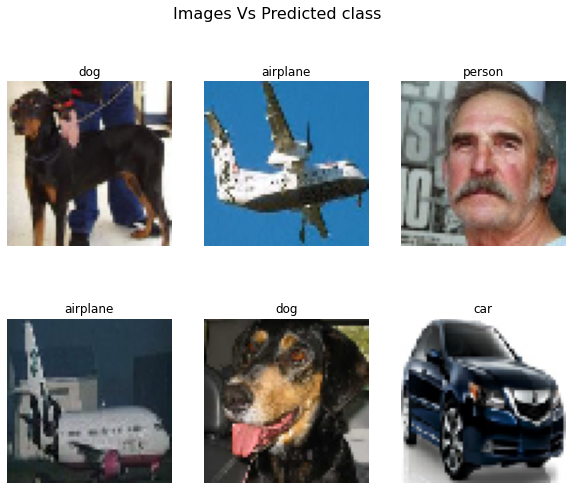

In [41]:
plt.subplots(nrows=2,ncols=3,figsize=(10,8))
plt.suptitle("Images Vs Predicted class", fontsize=16)
for i in range(6):
    plt.subplot(2,3,i+1)
    predicts = np.argmax(cnn_y_pred[i])
    #print('The first 6 predictions are of class:',predicts)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(categories[predicts])
   

From the plots above, we can see how well the second model has done. 

### Classification report (Convolutional model)

In [42]:
cnn_y_pred_labels = [np.argmax(i) for i in cnn_y_pred]

In [43]:
print('CNN classification Report', classification_report(y_test, cnn_y_pred_labels))

CNN classification Report               precision    recall  f1-score   support

           0       0.94      0.95      0.95       197
           1       0.89      0.96      0.92       239
           2       0.83      0.66      0.73       223
           3       0.62      0.67      0.64       157
           4       0.89      0.91      0.90       212
           5       0.99      1.00      0.99       238
           6       0.93      0.97      0.95       192
           7       1.00      0.99      0.99       267

    accuracy                           0.90      1725
   macro avg       0.89      0.89      0.89      1725
weighted avg       0.90      0.90      0.90      1725



f1 score for class 2 and 3 is better above compared to the first one. 

In [44]:
print(confusion_matrix(y_test,cnn_y_pred_labels))

[[188   3   0   2   1   0   3   0]
 [  0 229   1   4   3   0   2   0]
 [  1   9 147  55   8   0   2   1]
 [  6   8  26 105   9   2   1   0]
 [  4   4   3   2 193   1   5   0]
 [  0   0   0   0   0 238   0   0]
 [  0   4   0   0   2   0 186   0]
 [  1   0   1   1   0   0   0 264]]


Comparing the confusion matrix between two models, there are more correct predictions made by our second model (cnn). 

### Saving the model
As our second model does much better, we will save this model and it can be used in future so that we don't have to do the training again. 

In [45]:
cnn.save('cnn_model.h5')

# Summary

If we check the classification report of dense layer model and convolutional layered model, f1 score of second one is much better compared to the first one. Our convolutional model has done much better for this dataset. In CNN classication report, f1 score for class 2 (cat) and class 3(dog) is much better compared to dense layered model.